In [15]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import support as support

In [2]:
df_train_s3 = support.read_from_s3("hr_train_data","hranalyticsdata/new")

In [3]:
df_train = df_train_s3.copy()
df_train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [4]:
print ('Train data:',df_train.shape)

Train data: (19158, 14)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
 df_train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [7]:
df_train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [8]:
df_train.groupby([ 'education_level', 'enrolled_university']).count()

enrollee_id  city  \
education_level enrolled_university                      
Graduate        Full time course            2209  2209   
                Part time course             784   784   
                no_enrollment               8434  8434   
High School     Full time course             864   864   
                Part time course             166   166   
                no_enrollment                940   940   
Masters         Full time course             557   557   
                Part time course             204   204   
                no_enrollment               3547  3547   
Phd             Full time course              25    25   
                Part time course              12    12   
                no_enrollment                371   371   
Primary School  Full time course              33    33   
                Part time course              11    11   
                no_enrollment                255   255   

                                     city_development_index  gender  \
education_level enrolled_university                                   
Graduate        Full time course                       2209    1501   
                Part time course                        784     593   
                no_enrollment                          8434    6835   
High School     Full time course                        864     644   
                Part time course                        166     123   
                no_enrollment                           940     701   
Masters         Full time course                        557     366   
                Part time course                        204     135   
                no_enrollment                          3547    2793   
Phd             Full time course                         25      15   
                Part time course                         12       9   
                no_enrollment                           371     303   
Primary School  Full time course                         33      19   
                Part time course                         11       6   
                no_enrollment                           255     182   

                                     relevent_experience  major_discipline  \
education_level enrolled_university                                          
Graduate        Full time course                    2209              2200   
                Part time course                     784               784   
                no_enrollment                       8434              8422   
High School     Full time course                     864                 0   
                Part time course                     166                 0   
                no_enrollment                        940                 0   
Masters         Full time course                     557               556   
                Part time course                     204               203   
                no_enrollment                       3547              3543   
Phd             Full time course                      25                25   
                Part time course                      12                12   
                no_enrollment                        371               371   
Primary School  Full time course                      33                 0   
                Part time course                      11                 0   
                no_enrollment                        255                 0   

                                     experience  company_size  company_type  \
education_level enrolled_university                                           
Graduate        Full time course           2195          1040          1073   
                Part time course            784           587           571   
                no_enrollment              8418          6705          6511   
High School     Full time course            864           252           281   
                Part time course         

In [9]:
df_train['target'].unique()

array([1., 0.])

- Transformation:
    - Gender, major_discipline column: Create another category called "others"
    - enrolled_university, education_level, last_new_jobs: fill it with the mode
    - figure how to handle company_size and company_type = company_type(Other), experience (Mode), company_size (Other)
- Analysis:
    - A lot of analysis: create a presentation powerpoint, pdf
        - correlations
        - bar plot
        - pie charts
- ML Transformation
    - Label Encoder
    - One Hot Encoding
    - Embedding
    
- Model 
        

In [10]:
df_train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [11]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
tran = support.Transformation(df_train)

In [16]:
hr = tran.run_process()

In [17]:
hr.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [18]:
hr = hr.drop("enrollee_id", axis=1)

In [20]:
hr.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [21]:
pip install pivottablejs

  Using cached pivottablejs-0.9.0-py2.py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from pivottablejs import pivot_ui

pivot_ui(hr)

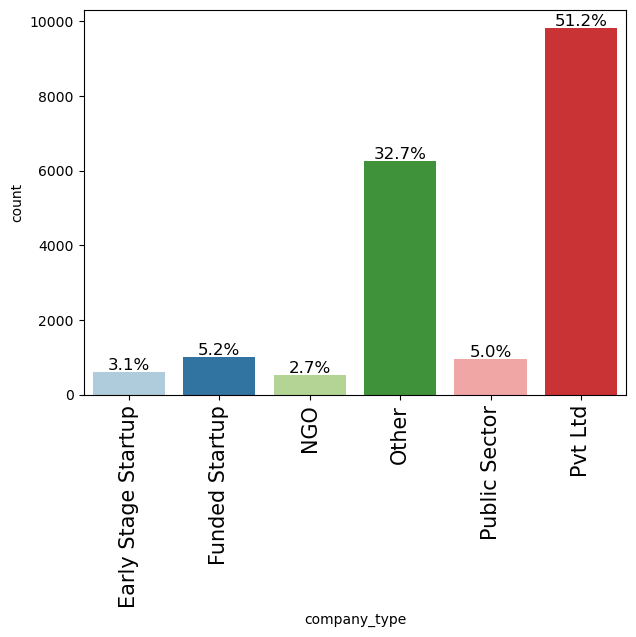

In [25]:
support.labeled_barplot(hr,"company_type",perc=True)

#### FInd correlation of categorical variables

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot (x='education_level',y='city_development_index', data=df_train, label='blue')

In [15]:
copy HR-Analytics.ipynb "C:\Users\Nathaniel\PycharmProjects\HR_Recruitment_Analysis\"

        1 file(s) copied.


In [16]:
copy support.py "C:\Users\Nathaniel\PycharmProjects\HR_Recruitment_Analysis\"

        1 file(s) copied.
